In [239]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #To Interact with local system directories
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so For Plots!
from scipy import stats #import chi2_contigency #  for Chi square Test
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier # checking if this is available
#from sklearn import cross_validation
%matplotlib inline

In [240]:
#Read the csv file
df = pd.read_csv("day.csv")

In [241]:
#Get the number of rows and columns
df.shape

(731, 16)

In [242]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [243]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [245]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [246]:
#Create a new dataframe containing required columns and creating new columns
df_1 = df.copy()

#Create new columns
#Create a new dataframe containing required columns and creating new columns

df_1['normalised_temp'] = df['temp'] *39
df_1['normalised_feeling_temp'] = df['atemp'] *50
df_1['normalised_windspeed'] = df['windspeed'] *67
df_1['normalised_hum'] = df['hum'] *100

df_1['specific_season'] = df['season'].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])
df_1['specific_yr'] = df['yr'].replace([0,1],["2011","2012"])
df_1['specific_holiday'] = df['holiday'].replace([0,1],["Working day","Holiday"])
df_1['specific_weathersit'] = df['weathersit'].replace([1,2,3,4],["Clear","Cloudy/Mist","Rain/Snow/Fog","Heavy Rain/Snow/Fog"])

In [247]:
df_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,normalised_temp,normalised_feeling_temp,normalised_windspeed,normalised_hum,specific_season,specific_yr,specific_holiday,specific_weathersit
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,654,985,13.422513,18.18125,10.749882,80.5833,Spring,2011,Working day,Cloudy/Mist
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,670,801,14.175642,17.68695,16.652113,69.6087,Spring,2011,Working day,Cloudy/Mist
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1229,1349,7.658196,9.47025,16.636703,43.7273,Spring,2011,Working day,Clear
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,1454,1562,7.800000,10.60610,10.739832,59.0435,Spring,2011,Working day,Clear
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,1518,1600,8.851323,11.46350,12.522300,43.6957,Spring,2011,Working day,Clear


In [248]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 24 columns):
instant                    731 non-null int64
dteday                     731 non-null object
season                     731 non-null int64
yr                         731 non-null int64
mnth                       731 non-null int64
holiday                    731 non-null int64
weekday                    731 non-null int64
workingday                 731 non-null int64
weathersit                 731 non-null int64
temp                       731 non-null float64
atemp                      731 non-null float64
hum                        731 non-null float64
windspeed                  731 non-null float64
casual                     731 non-null int64
registered                 731 non-null int64
cnt                        731 non-null int64
normalised_temp            731 non-null float64
normalised_feeling_temp    731 non-null float64
normalised_windspeed       731 non-null float64
normal

In [249]:
#Change the data types

df_1['season'] = df_1['season'].astype('category')
df_1['yr'] = df_1['yr'].astype('category')
df_1['mnth'] = df_1['mnth'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df_1['weekday'] = df_1['weekday'].astype('category')
df_1['workingday'] = df_1['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')
df_1['specific_season'] = df_1['specific_season'].astype('category')
df_1['specific_yr'] = df_1['specific_yr'].astype('category')
df_1['specific_holiday'] = df_1['specific_holiday'].astype('category')
df_1['specific_weathersit'] = df_1['specific_weathersit'].astype('category')

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 24 columns):
instant                    731 non-null int64
dteday                     731 non-null object
season                     731 non-null category
yr                         731 non-null category
mnth                       731 non-null category
holiday                    731 non-null int64
weekday                    731 non-null category
workingday                 731 non-null category
weathersit                 731 non-null int64
temp                       731 non-null float64
atemp                      731 non-null float64
hum                        731 non-null float64
windspeed                  731 non-null float64
casual                     731 non-null int64
registered                 731 non-null int64
cnt                        731 non-null int64
normalised_temp            731 non-null float64
normalised_feeling_temp    731 non-null float64
normalised_windspeed       731 non-null

In [250]:
#Check the count of values of categorical variables
print(df_1.workingday.value_counts())
print(df_1.weekday.value_counts())
print(df_1.mnth.value_counts())
print(df_1.specific_yr.value_counts())
print(df_1.specific_holiday.value_counts())
print(df_1.specific_weathersit.value_counts())

1    500
0    231
Name: workingday, dtype: int64
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
2012    366
2011    365
Name: specific_yr, dtype: int64
Working day    710
Holiday         21
Name: specific_holiday, dtype: int64
Clear            463
Cloudy/Mist      247
Rain/Snow/Fog     21
Name: specific_weathersit, dtype: int64


In [251]:
#Checking for missing values

df_1.isnull().sum()

instant                    0
dteday                     0
season                     0
yr                         0
mnth                       0
holiday                    0
weekday                    0
workingday                 0
weathersit                 0
temp                       0
atemp                      0
hum                        0
windspeed                  0
casual                     0
registered                 0
cnt                        0
normalised_temp            0
normalised_feeling_temp    0
normalised_windspeed       0
normalised_hum             0
specific_season            0
specific_yr                0
specific_holiday           0
specific_weathersit        0
dtype: int64

/Users/monikawadhwani/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/monikawadhwani/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


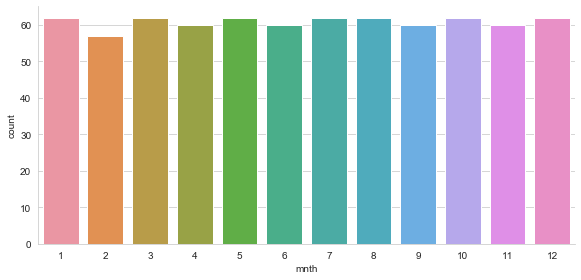

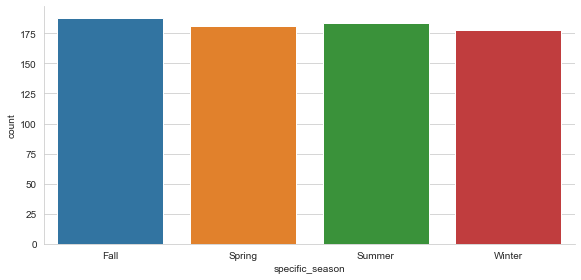

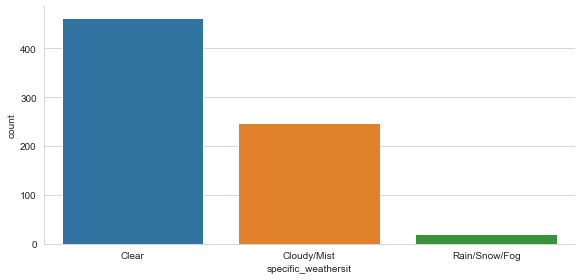

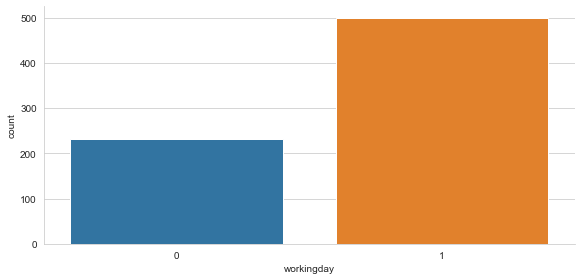

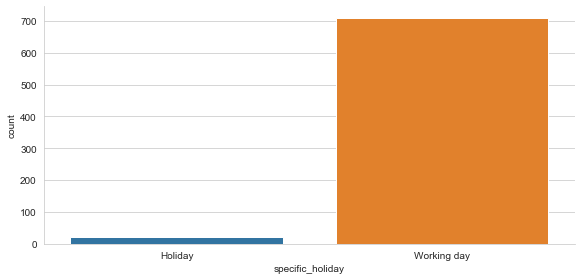

In [252]:
#Check the bar graph of categorical Data using factorplot

sns.set_style("whitegrid")
sns.factorplot(data=df_1, x='mnth', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df_1, x='specific_season', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df_1, x='specific_weathersit', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df_1, x='workingday', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df_1, x='specific_holiday', kind= 'count',size=4,aspect=2)

Text(0.5, 1.0, 'Temperature Distribution')

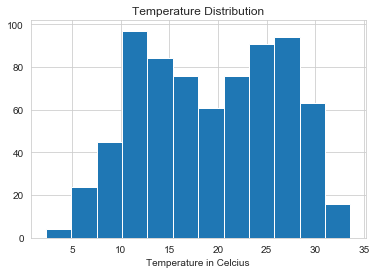

In [253]:
#Check the distribution of numerical data using histogram
plt.hist(data=df_1, x='normalised_temp', bins='auto', label='Temperature')
plt.xlabel('Temperature in Celcius')
plt.title("Temperature Distribution")

Text(0.5, 1.0, 'Humidity Distribution')

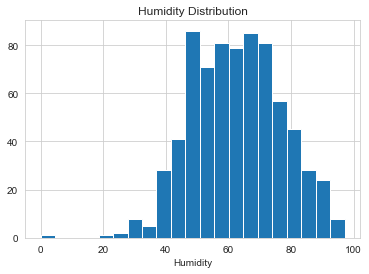

In [254]:
plt.hist(data=df_1, x='normalised_hum', bins='auto', label='Temperature')
plt.xlabel('Humidity')
plt.title("Humidity Distribution")

Text(0.5, 1.0, 'feeling temperature distribution')

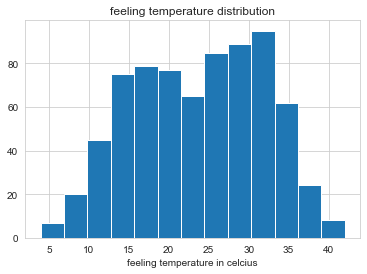

In [255]:
plt.hist(data=df_1, x='normalised_feeling_temp', bins='auto', label='Temperature')
plt.xlabel('feeling temperature in celcius')
plt.title("feeling temperature distribution")

Text(0.5, 1.0, 'windspeed distribution')

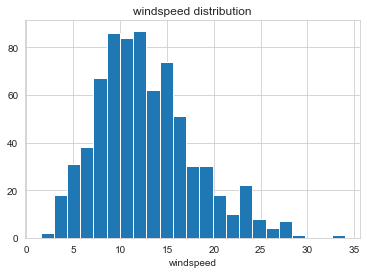

In [256]:
plt.hist(data=df_1, x='normalised_windspeed', bins='auto', label='Temperature')
plt.xlabel('windspeed')
plt.title("windspeed distribution")

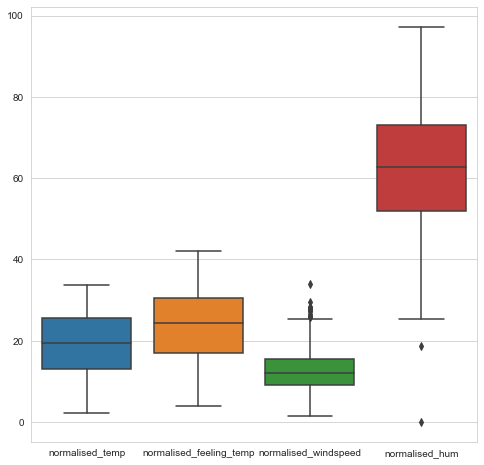

In [257]:
#Check for outliers in data using boxplot
sns.boxplot(data=df_1[['normalised_temp','normalised_feeling_temp','normalised_windspeed','normalised_hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [258]:
#Remove outliers in Humidity
q75, q25 = np.percentile(df_1['normalised_hum'], [75 ,25])
print(q75,q25)
iqr = q75 - q25
print(iqr)
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

df_1 = df_1.drop(df_1[df_1.iloc[:,19] < min].index)
df_1 = df_1.drop(df_1[df_1.iloc[:,19] > max].index)

73.02085 52.0
21.020849999999996
20.468725000000006
104.55212499999999


In [259]:
#Remove outliers in Windspeed
q75, q25 = np.percentile(df_1['normalised_windspeed'], [75 ,25])
print(q75,q25)
iqr = q75 - q25
print(iqr)
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

df_1 = df_1.drop(df_1[df_1.iloc[:,18] < min].index)
df_1 = df_1.drop(df_1[df_1.iloc[:,18] > max].index)

15.624668 9.041649999999999
6.583018000000001
-0.8328770000000016
25.499195


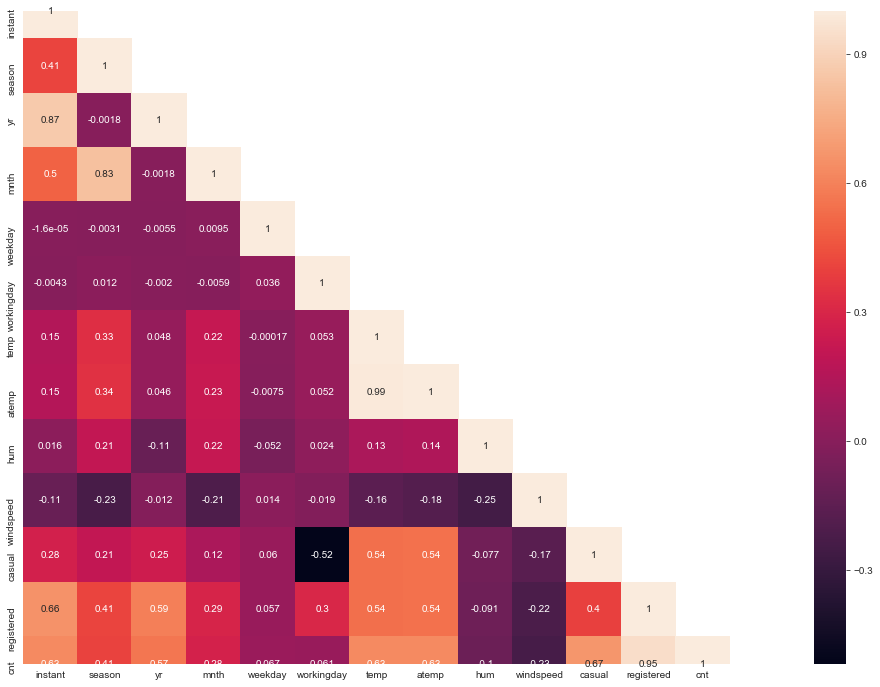

In [260]:
#Check for collinearity using corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Text(0, 0.5, 'Count of bikes')

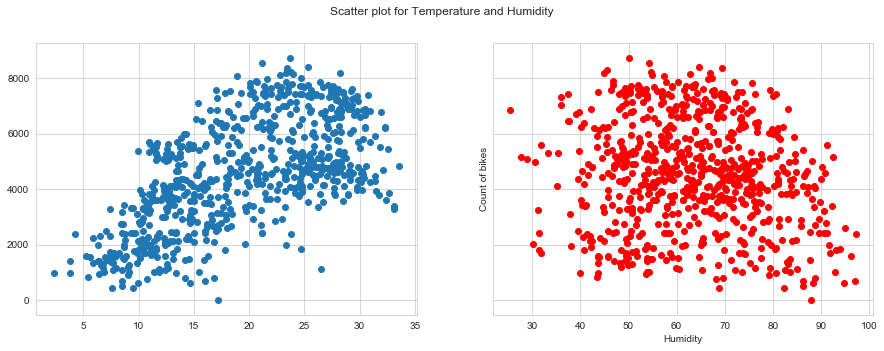

In [261]:
#Check the distribution of Temperature and Humdity against Bike rental count using scatter plot
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=df_1, x='normalised_temp', y='cnt')
axs[1].scatter(data=df_1, x='normalised_hum', y='cnt', color = 'red')
fig.suptitle('Scatter plot for Temperature and Humidity')
plt.xlabel("Humidity")
plt.ylabel("Count of bikes")

Text(0, 0.5, 'Count of bikes')

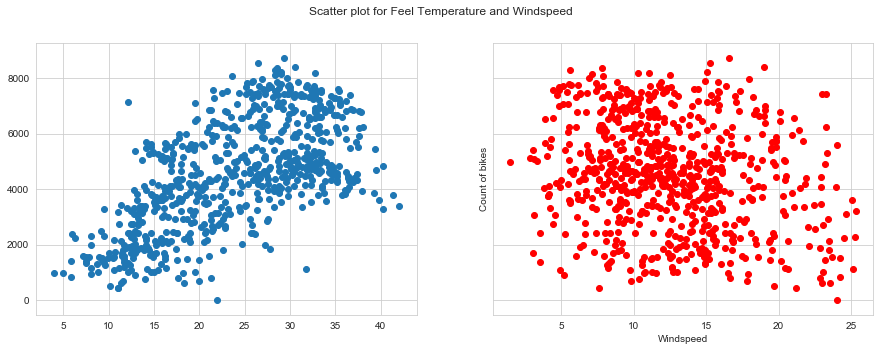

In [262]:
#Check the distribution of Feel Temperature and Windspeed against Bike rental count using scatter plot
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=df_1, x='normalised_feeling_temp', y='cnt')
axs[1].scatter(data=df_1, x='normalised_windspeed', y='cnt', color = 'red')
fig.suptitle('Scatter plot for Feel Temperature and Windspeed')
plt.xlabel("Windspeed")
plt.ylabel("Count of bikes")

In [263]:
df_1=df_1.drop(columns=['holiday','instant','dteday','atemp','casual','registered','normalised_temp','normalised_feeling_temp',
                      'normalised_windspeed','normalised_hum','specific_season','specific_yr','specific_holiday','specific_weathersit'])

# LINEAR REGRESSION

In [269]:
#import libraries for Linear regression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
#Divide data into train and test
train,test = train_test_split(df_1, test_size = 0.2, random_state = 123)

In [272]:
#Train the model
model_lr = sm.OLS(train.iloc[:,9].astype(float), train.iloc[:,0:9].astype(float)).fit()

In [274]:
#Check the summary of model
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1852.
Date:                Fri, 15 Nov 2019   Prob (F-statistic):                        0.00
Time:                        22:42:38   Log-Likelihood:                         -4702.3
No. Observations:                 573   AIC:                                      9423.
Df Residuals:                     564   BIC:                                      9462.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       501.2710     63.499      7.894      0.000     376.547     625.995
yr          2165.3818     73.646     29.403      0.000    2020.728    2310.035
mnth         -30.3433     19.923     -1.523      0.128     -69.475       8.788
weekday      113.7669     18.372      6.193      0.000      77.682     149.852
workingday   345.8864     80.004      4.323      0.000     188.745     503.028
weathersit  -720.5377     91.846     -7.845      0.000    -900.939    -540.137
temp        5362.5801    217.252     24.684      0.000    4935.859    5789.301
hum          373.1974    299.862      1.245      0.214    -215.786     962.181
windspeed   -688.6358    447.378     -1.539      0.124   -1567.367     190.095
==============================================================================
Omnibus:                      100.038   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.984
Skew:                          -0.914   Prob(JB):                     5.71e-52
Kurtosis:                       5.558   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [275]:
#Predict the results of test data
predictions_lr = model_lr.predict(test.iloc[:,0:9])

In [276]:
#Create a dataframe for actual values and predicted values
df_lr = pd.DataFrame({'actual': test.iloc[:,9], 'pred': predictions_lr})
df_lr.head()

,actual,pred
226,4338,4692.62
430,3956,3845.93
649,7570,6328.03
653,5875,5957.77
342,3620,3597.48


In [288]:
#Function for Mean Absolute Percentage Error
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))
    return mape

In [289]:
#Calclulate MAPE
MAPE(test.iloc[:,9],predictions_lr)

0.19087009118495935

# This means  Accuracy: 81.92%
# MAPE:19.08%
# Adjusted r2: 0.967
# F-stat: 1852

# DECISION TREE

In [284]:
#Import Libraries for decision tree
from sklearn.tree import DecisionTreeRegressor

In [285]:
#Train the model
model_dt = DecisionTreeRegressor(random_state=123).fit(train.iloc[:,0:9], train.iloc[:,9])

In [286]:
#Predict the results of test data
predictions_dt = dt_model.predict(test.iloc[:,0:9])

In [287]:
df_dt = pd.DataFrame({'actual': test.iloc[:,9], 'pred': predictions_dt})
df_dt.head()

,actual,pred
226,4338,4456.0
430,3956,3830.0
649,7570,7282.0
653,5875,7112.0
342,3620,3523.0


In [291]:
#Calculate MAPE for decision tree
MAPE(test.iloc[:,9],predictions_dt)

0.18407710686962875

# This means Accuracy is 81.60%
# MAPE = 18.40%

# RANDOM FOREST

In [292]:
#Import library for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [293]:
#Train the model
model_rf = RandomForestRegressor(n_estimators=500,random_state=123).fit(train.iloc[:,0:9], train.iloc[:,9])

In [294]:
#Predict the results of test data
predictions_rf = model_rf.predict(test.iloc[:,0:9])

In [296]:
#Create a dataframe for actual values and predicted values
df_rf = pd.DataFrame({'actual': test.iloc[:,9], 'pred': predictions_rf})
df_rf.head()

,actual,pred
226,4338,4535.294
430,3956,3262.924
649,7570,6815.408
653,5875,6814.228
342,3620,3588.416


In [298]:
#Calculate MAPE
MAPE(test.iloc[:,9],predictions_rf)

0.13103815551097941

#  This means Accuracy : 86.90% 
#  MAPE: 13.10%